<a href="https://colab.research.google.com/github/jenleep/TechChallenge4/blob/main/TechChallenge4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## O Problema

**Desenvolver um modelo de ML para auxiliar médic@s a prever ser uma pessoa pode ter obesidade.**

Por que não usar o IMC (kg/m²)?

- ignora outros fatores importantes como hábitos alimentares, nível de atividade física, consumo de água, histórico familiar de excesso de peso, entre outros
- IMC não distingue entre massa muscular e gordura corporal
- modelo de ml pode levar em contas características mais individuais

Importância de pode classificar o nível de obesidade:

- ajuda a prever a possibilidade de questões de saúde ligadas a obesidade, como diabetes tipo dois, doenças cardiovasculares e tipos de câncer
- guia indivíduos a fazerem escolhas mais saudáveis no intuito de gerenciar o peso de forma mais eficaz
- ajuda na criação de planos mais individualizados

**Entregáveis**

- pipeline do ml

    - acurácia > 75%

- aplicação preditiva com Streamlit

    - app interativo com input de dados do paciente
    - resultado da predição do nível de obesidade
    - deploy no Streamlit

- painel analítico

    - principais insights

- video

    - estrategia utilizada
    - apresentação do sistema preditivo

- arquivo .txt com

    - link da aplicação deployada no Streamlit
    - link do painel analítico
    - link do repositório no GitHub

# Preparo do ambiente

In [ ]:
# instalar streamlit
!pip install streamlit

In [ ]:
# instalar shap
!pip install shap

In [ ]:
# manipulação de dados
import pandas as pd
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# pré-processamento
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# modelagem e avaliação
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# balanceamento de classes
from imblearn.over_sampling import SMOTE

# utilitários
import joblib
import shap
import shap
import numpy as np


# ler arquivo csv
df = pd.read_csv('/content/Obesity.csv')
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# ver o nome das colunas
display(df.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')

In [ ]:
# verificar os tipos de dados
display(df.dtypes)

,0
Gender,object
Age,float64
Height,float64
Weight,float64
family_history,object
FAVC,object
FCVC,float64
NCP,float64
CAEC,object
SMOKE,object


| Variável               | Tipo                     | Descrição                                                                 |
|------------------------|--------------------------|---------------------------------------------------------------------------|
| `sexo`                 | Qualitativa nominal      | Sexo biológico, sem ordem implícita.                                      |
| `idade`                | Quantitativa contínua    | Idade em anos.                                                            |
| `altura`               | Quantitativa contínua    | Altura em metros.                                                         |
| `peso`                 | Quantitativa contínua    | Peso em quilogramas.                                                      |
| `historico_familiar`   | Qualitativa nominal      | Histórico familiar de obesidade.                                          |
| `alimentos_caloricos`  | Qualitativa nominal      | Consumo de alimentos calóricos.                                           |
| `vegetais`             | Quantitativa contínua    | Frequência de consumo de vegetais.                                        |
| `refeicoes_principais` | Quantitativa contínua    | Número de refeições principais por dia.                                   |
| `entre_refeicoes`      | Qualitativa ordinal      | Frequência de comer entre refeições (com ordem semântica).                |
| `fuma`                 | Qualitativa nominal      | Hábito de fumar.                                                          |
| `agua`                 | Quantitativa contínua    | Quantidade de água ingerida diariamente.                                  |
| `monitora_calorias`    | Qualitativa nominal      | Se monitora a ingestão calórica.                                          |
| `atividade_fisica`     | Quantitativa contínua    | Frequência de atividade física semanal.                                   |
| `dispositivos_tecnologicos` | Quantitativa contínua | Tempo de uso de dispositivos eletrônicos.                                 |
| `alcool`               | Qualitativa ordinal      | Frequência de consumo de álcool (com ordem semântica).                    |
| `meio_transporte`      | Qualitativa nominal      | Meio de transporte utilizado.                                             |
| `obesidade`            | Qualitativa ordinal      | Nível de obesidade (variável alvo), com progressão de gravidade.         |


In [ ]:
# verificar se há dados nulos
display(df.isnull().sum())

,0
Gender,0
Age,0
Height,0
Weight,0
family_history,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [ ]:
# renomear as colunas para melhor compreensão
colunas_para_renomear = {'Gender': 'sexo', 'Age': 'idade', 'Height': 'altura',
                         'Weight': 'peso', 'family_history': 'historico_familiar',
                         'FAVC': 'alimentos_caloricos', 'FCVC': 'vegetais',
                         'NCP': 'refeicoes_principais', 'CAEC': 'entre_refeicoes',
                         'SMOKE': 'fuma', 'CH2O': 'agua', 'SCC': 'monitora_calorias',
                         'FAF': 'atividade_fisica', 'TUE': 'dispositivos_tecnologicos',
                         'CALC': 'alcool', 'MTRANS': 'meio_transporte', 'Obesity': 'obesidade'}

df = df.rename(columns=colunas_para_renomear)
display(df.columns)

Index(['sexo', 'idade', 'altura', 'peso', 'historico_familiar',
       'alimentos_caloricos', 'vegetais', 'refeicoes_principais',
       'entre_refeicoes', 'fuma', 'agua', 'monitora_calorias',
       'atividade_fisica', 'dispositivos_tecnologicos', 'alcool',
       'meio_transporte', 'obesidade'],
      dtype='object')

In [ ]:
# ver quais são os tipos de categorias
colunas_qualitativas = ['sexo', 'historico_familiar', 'alimentos_caloricos', 'entre_refeicoes',
                 'fuma', 'monitora_calorias', 'alcool', 'meio_transporte', 'obesidade']

for coluna in df[colunas_qualitativas]:
  print(f"Unique values for column '{coluna}':")
  display(df[coluna].value_counts())
  print("-" * 30)

Unique values for column 'sexo':


,count
sexo,
Male,1068
Female,1043


------------------------------
Unique values for column 'historico_familiar':


,count
historico_familiar,
yes,1726
no,385


------------------------------
Unique values for column 'alimentos_caloricos':


,count
alimentos_caloricos,
yes,1866
no,245


------------------------------
Unique values for column 'entre_refeicoes':


,count
entre_refeicoes,
Sometimes,1765
Frequently,242
Always,53
no,51


------------------------------
Unique values for column 'fuma':


,count
fuma,
no,2067
yes,44


------------------------------
Unique values for column 'monitora_calorias':


,count
monitora_calorias,
no,2015
yes,96


------------------------------
Unique values for column 'alcool':


,count
alcool,
Sometimes,1401
no,639
Frequently,70
Always,1


------------------------------
Unique values for column 'meio_transporte':


,count
meio_transporte,
Public_Transportation,1580
Automobile,457
Walking,56
Motorbike,11
Bike,7


------------------------------
Unique values for column 'obesidade':


,count
obesidade,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


------------------------------


In [ ]:
# codificar valores binários e categóricos
colunas_binarias = ['sexo', 'historico_familiar', 'alimentos_caloricos', 'fuma', 'monitora_calorias']

colunas_categoricas = ['entre_refeicoes', 'alcool', 'meio_transporte', 'obesidade']

# onehotencoder
onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
df_labels = onehot.fit_transform(df[colunas_binarias])
df_labels = pd.DataFrame(df_labels, columns=onehot.get_feature_names_out(colunas_binarias))
df_labels = pd.concat([df.drop(columns=colunas_binarias), df_labels], axis=1)

# label encoder
for coluna in colunas_categoricas:
  le = LabelEncoder()
  df_labels[coluna] = le.fit_transform(df[coluna])

display(df_labels.head())

,idade,altura,peso,vegetais,refeicoes_principais,entre_refeicoes,agua,atividade_fisica,dispositivos_tecnologicos,alcool,...,sexo_Female,sexo_Male,historico_familiar_no,historico_familiar_yes,alimentos_caloricos_no,alimentos_caloricos_yes,fuma_no,fuma_yes,monitora_calorias_no,monitora_calorias_yes
0,21.0,1.62,64.0,2.0,3.0,2,2.0,0.0,1.0,3,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,21.0,1.52,56.0,3.0,3.0,2,3.0,3.0,0.0,2,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,23.0,1.80,77.0,2.0,3.0,2,2.0,2.0,1.0,1,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,27.0,1.80,87.0,3.0,3.0,2,2.0,2.0,0.0,1,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,22.0,1.78,89.8,2.0,1.0,2,2.0,0.0,0.0,2,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


# Análise exploratória

A maioria dos participantes é jovem, com idade média de 24,3 anos, o que pode influenciar a generalização do modelo para faixas etárias mais elevadas. A altura média é de 1,70 metros, com baixa variabilidade, enquanto o peso apresenta ampla dispersão, indicando perfis corporais bastante distintos. A distribuição das classes de obesidade é equilibrada.

In [ ]:
# descrever as variáveis quantitativas
colunas_quantitativas = ['idade', 'altura', 'peso', 'vegetais', 'refeicoes_principais',
                         'agua', 'atividade_fisica', 'dispositivos_tecnologicos',
                         'obesidade']

display(df_labels[colunas_quantitativas].describe())

,idade,altura,peso,vegetais,refeicoes_principais,agua,atividade_fisica,dispositivos_tecnologicos,obesidade
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,3.015632
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,1.952090
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,1.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,3.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,5.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,6.000000


##### Idade
- Range: 14 a 61 anos
- Média: 24,3 anos
- População maior de jovens, podendo afetar generalização a público mais idoso

##### Altura
- Range: 1,45 a 1,98 metros
- Média: 1,70 metros
- Altura típica de adultos, desvio padrão baixo

##### Peso
- Range: 39 a 173 quilos
- Média: 86,60 quilos
- Alto desvio padrão, indicando variabilidade significativa

##### Verduras
- Escala: de 1 a 3
- Média: 2,42
- Em média, as pessoas comem uma quantidade boa de verduras

##### Refeições principais
- Range: 1 a 4
- Média: 2,69
- A maioria das pessoas comem enre 2 a 3 refeições por dia

##### Consumo de água
- Escala: 1 a 3
- Média: 2,01
- Consumo é médio

##### Atividade física
- Escala: 0 a 3
- Média: 1,01
- Aparenta uma tendência ao sedentarismo

##### Dispositivos tecnológicos
- Escala: 0 a 2
- Média: 0,66
- A maioria usa moderadamente

In [ ]:
print(df.shape)
print(df.info)

(2111, 17)
<bound method DataFrame.info of         sexo      idade    altura        peso historico_familiar  \
0     Female  21.000000  1.620000   64.000000                yes   
1     Female  21.000000  1.520000   56.000000                yes   
2       Male  23.000000  1.800000   77.000000                yes   
3       Male  27.000000  1.800000   87.000000                 no   
4       Male  22.000000  1.780000   89.800000                 no   
...      ...        ...       ...         ...                ...   
2106  Female  20.976842  1.710730  131.408528                yes   
2107  Female  21.982942  1.748584  133.742943                yes   
2108  Female  22.524036  1.752206  133.689352                yes   
2109  Female  24.361936  1.739450  133.346641                yes   
2110  Female  23.664709  1.738836  133.472641                yes   

     alimentos_caloricos  vegetais  refeicoes_principais entre_refeicoes fuma  \
0                     no       2.0                   3.0   

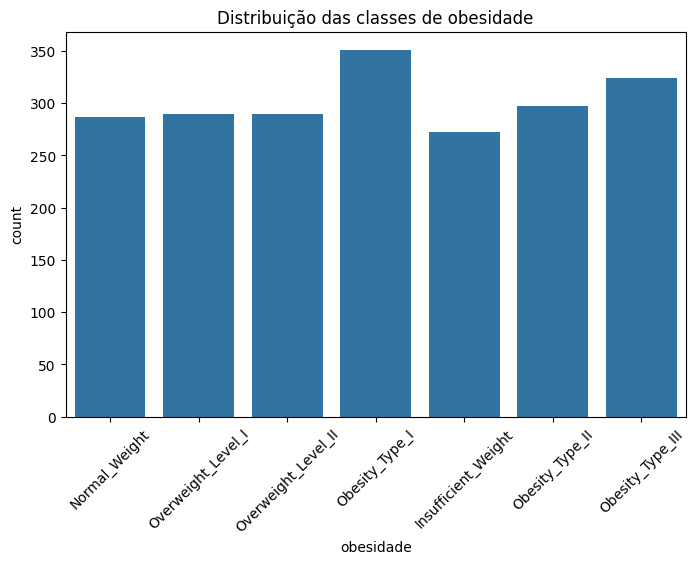

In [ ]:
# distribuição das classes
plt.figure(figsize=(8,5))
sns.countplot(x='obesidade', data=df)
plt.title('Distribuição das classes de obesidade')
plt.xticks(rotation=45)
plt.show()

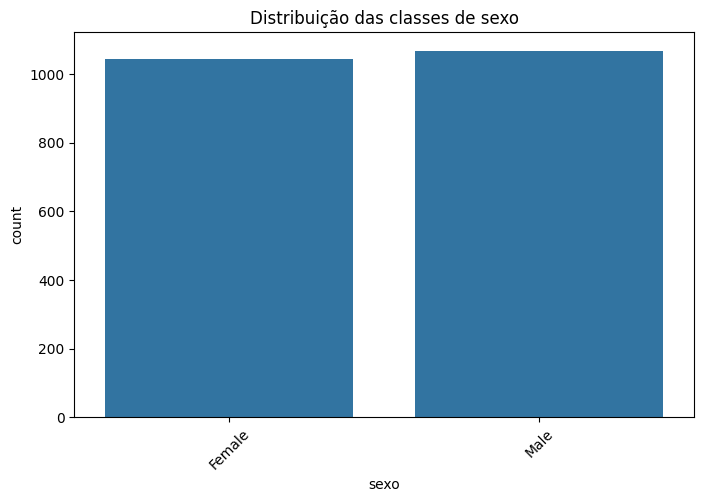

In [ ]:
# distribuição masculino/feminino
plt.figure(figsize=(8,5))
sns.countplot(x='sexo', data=df)
plt.title('Distribuição das classes de sexo')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# função para boxplots
def plot_boxplots(df, colunas_numericas, target='obesidade'):
    for col in colunas_numericas:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=target, y=col, data=df)
        plt.title(f'{col} por {target}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


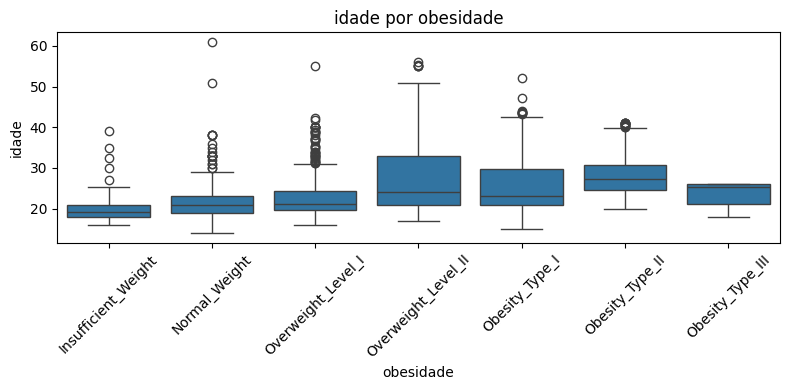

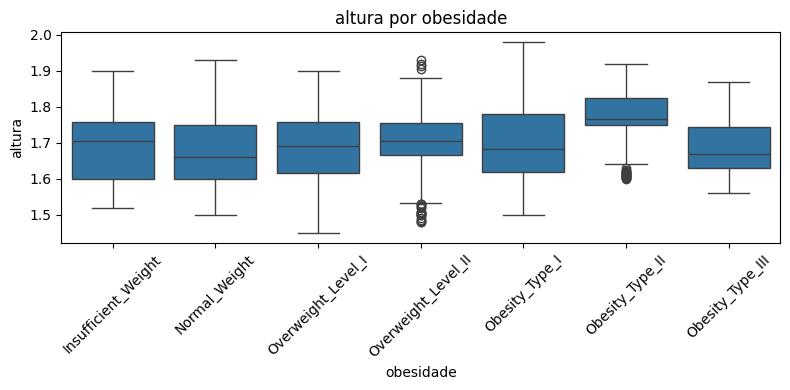

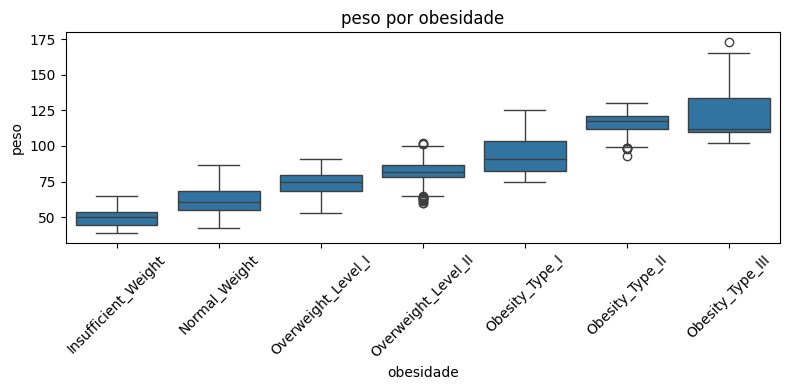

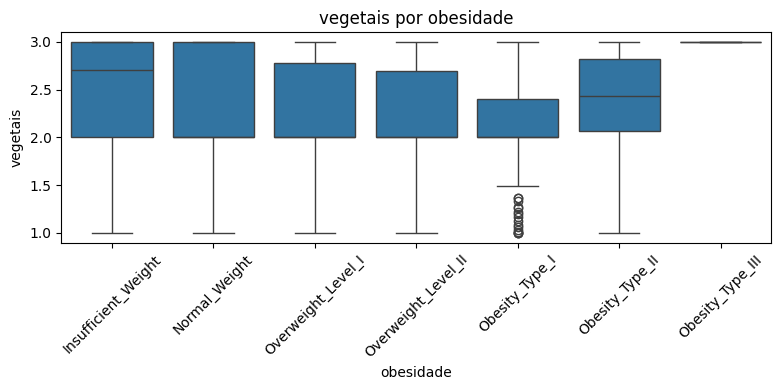

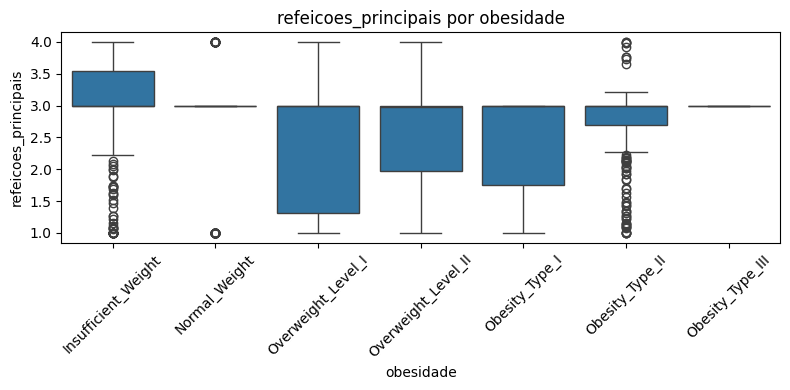

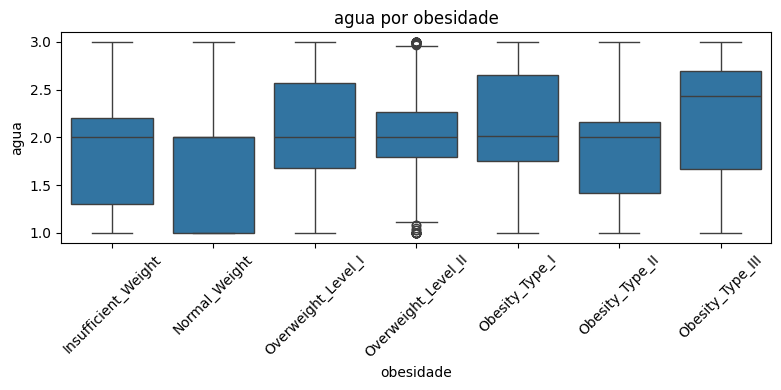

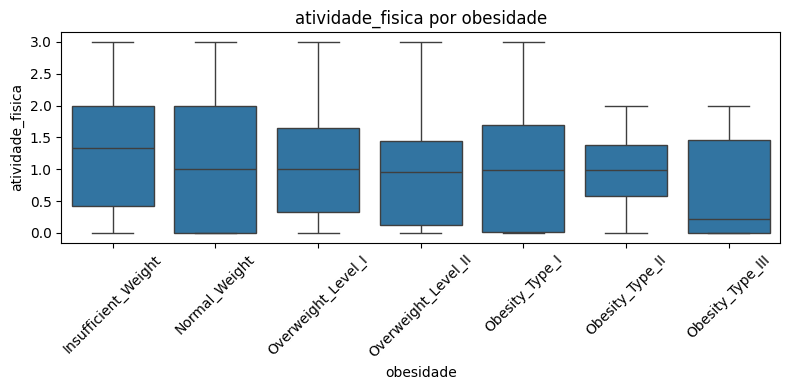

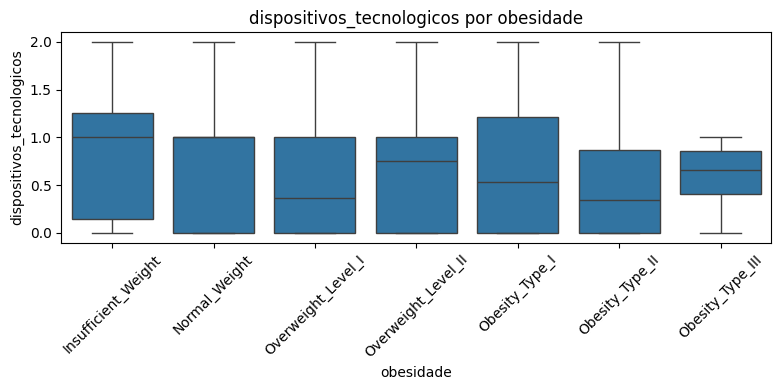

In [ ]:
# para organizar
colunas_numericas = ['idade', 'altura', 'peso', 'vegetais', 'refeicoes_principais',
                     'agua', 'atividade_fisica', 'dispositivos_tecnologicos']

# corrigir a ordem
ordem_personalizada = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

df['obesidade'] = pd.Categorical(df['obesidade'], categories=ordem_personalizada, ordered=True)

# plotar
plot_boxplots(df, colunas_numericas, target='obesidade')


In [ ]:
"""
Gera gráficos de barras para cada coluna categórica em relação à variável alvo.

Parâmetros:
- df: DataFrame com os dados
- colunas_categoricas: lista de colunas categóricas
- target: nome da coluna alvo (default: 'obesidade')
"""
def analisar_categoricas(df, colunas_categoricas, target='obesidade'):
    for col in colunas_categoricas:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, hue=target, data=df)
        plt.title(f'{col} por {target}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

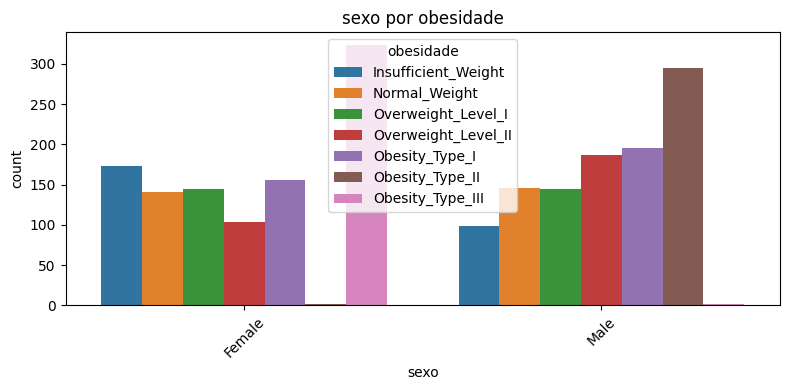

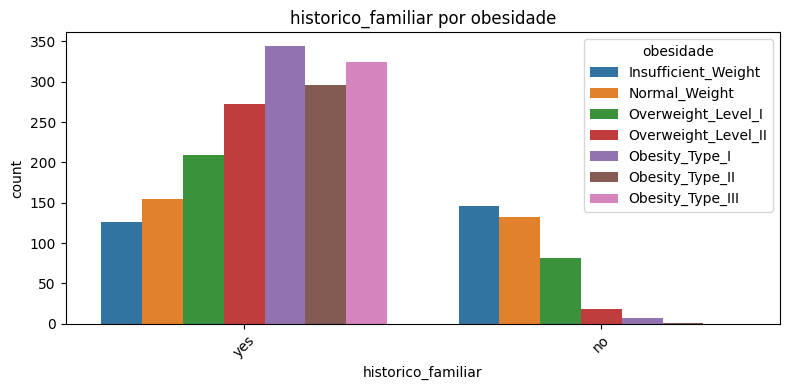

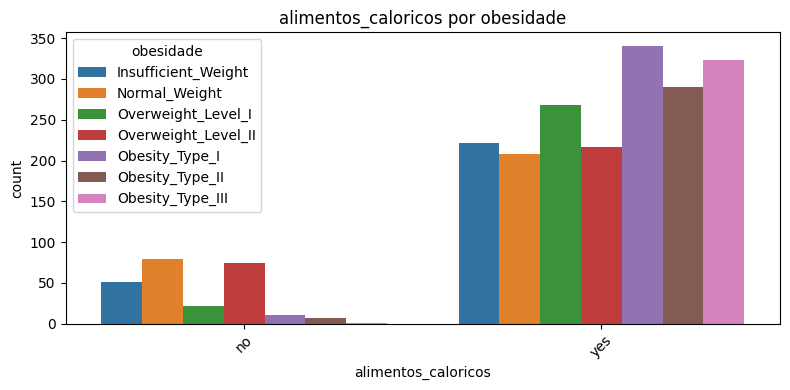

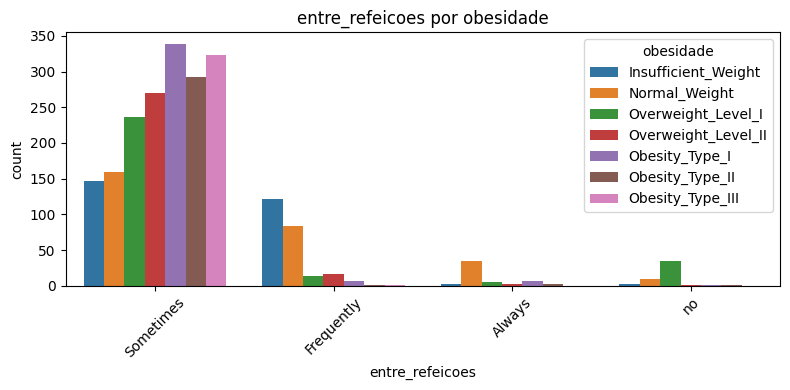

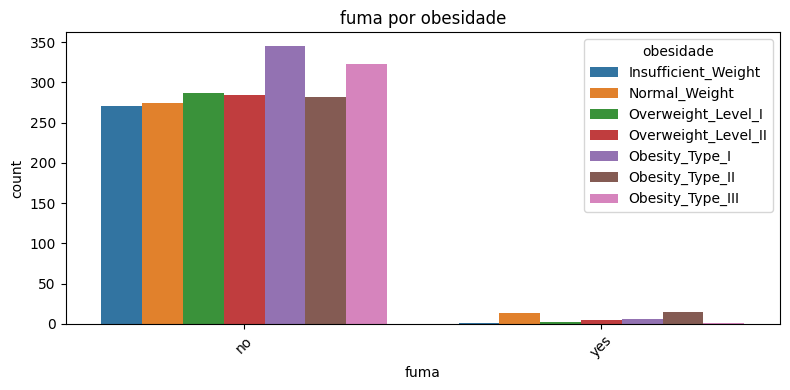

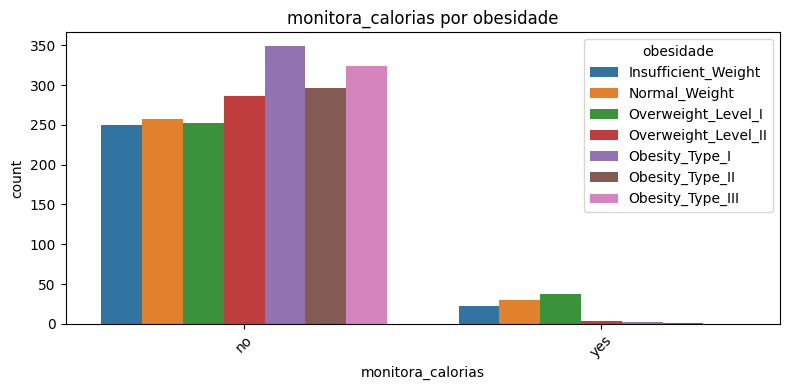

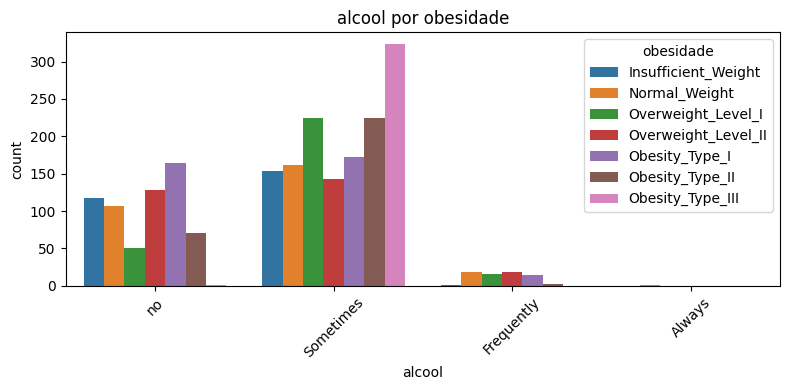

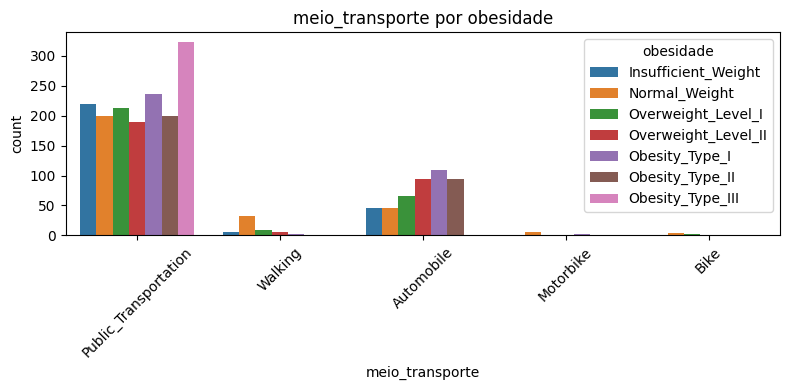

In [ ]:
# para organizar
colunas_categoricas = ['sexo', 'historico_familiar', 'alimentos_caloricos', 'entre_refeicoes',
                       'fuma', 'monitora_calorias', 'alcool', 'meio_transporte']

# analisar as variáveis categóricas
analisar_categoricas(df, colunas_categoricas, target='obesidade')


# Escolha das variáveis

Com base na análise exploratória e no mapa de correlações, foram selecionadas as variáveis com maior impacto na previsão dos níveis de obesidade. Entre elas estão **idade, altura, peso, consumo de vegetais, se come entre as refeições, ingestão de água, frequência de atividade física, uso de dispositivos tecnológicos, ingestão de álcool, histórico familiar, consumo alimentos calóricos, se monitora as calorias, se caminha como meio de transporte**.


In [ ]:
"""
Transforma colunas categóricas em numéricas, respeitando a ordem das ordinais.

Parâmetros:
- df: DataFrame original
- colunas_ordinais: lista de colunas com ordem
- ordem_ordinais: dicionário com a ordem de cada coluna ordinal
- colunas_nominais: lista de colunas sem ordem (nominais)

Retorna:
- df_transformado: DataFrame com colunas numéricas
"""
def transformar_categoricos(df, colunas_ordinais, ordem_ordinais, colunas_nominais):
    df_copy = df.copy()

    # Ordinais
    for col in colunas_ordinais:
        ordem = ordem_ordinais[col]
        encoder = OrdinalEncoder(categories=[ordem])
        df_copy[col] = encoder.fit_transform(df_copy[[col]])

    # Nominais
    encoder_nominal = OneHotEncoder(sparse_output=False, drop='first')
    df_nominal = pd.DataFrame(
        encoder_nominal.fit_transform(df_copy[colunas_nominais]),
        columns=encoder_nominal.get_feature_names_out(colunas_nominais),
        index=df_copy.index
    )

    # Remover originais nominais e juntar codificadas
    df_copy.drop(columns=colunas_nominais, inplace=True)
    df_transformado = pd.concat([df_copy, df_nominal], axis=1)

    return df_transformado


In [ ]:
# separar as colunas ordinais
colunas_ordinais = ['entre_refeicoes', 'alcool', 'obesidade']

# colocando as variáveis em ordem
ordem_ordinais = {
    'entre_refeicoes': ['no', 'Sometimes', 'Frequently', 'Always'],
    'alcool': ['no', 'Sometimes', 'Frequently', 'Always'],
    'obesidade': ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
}

colunas_nominais = ['sexo', 'historico_familiar', 'alimentos_caloricos', 'fuma', 'monitora_calorias', 'meio_transporte']

df_numerico = transformar_categoricos(df, colunas_ordinais, ordem_ordinais, colunas_nominais)


In [ ]:
"""
Gera um heatmap de correlações entre todas as colunas numéricas do DataFrame.

Parâmetros:
- df: DataFrame com colunas numéricas
- figsize: tamanho da figura
- cmap: paleta de cores do heatmap
"""
def plot_heatmap_correlacoes(df, figsize=(12, 10), cmap='coolwarm'):
    plt.figure(figsize=figsize)
    corr = df.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap=cmap, square=True, linewidths=0.5)
    plt.title("Mapa de Correlações entre Variáveis")
    plt.tight_layout()
    plt.show()


In [ ]:
# salvar o dataframe numerico para csv
df_numerico.to_csv('df_numerico.csv', index=False)

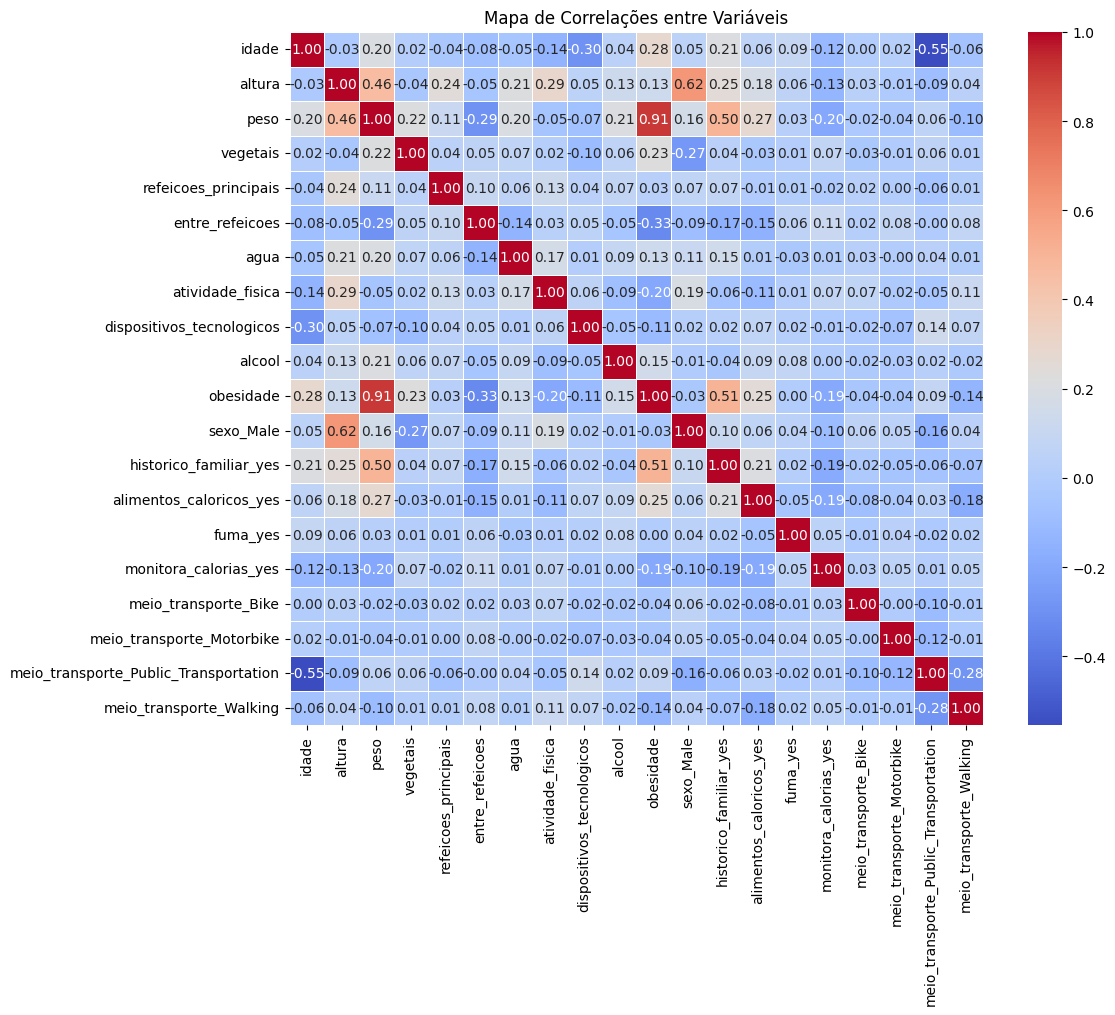

In [ ]:
# plotar as correlações
plot_heatmap_correlacoes(df_numerico)

Colunas com correlação com obesidade > 0.1:

- idade
- altura
- peso
- vegetais
- entre refeições
- agua
- atividade física
- dispositivos tecnologicos
- alcool
- histórico familiar
- alimentos calóricos
- monitora calorias
- meio de transporte

In [ ]:
# criando o df para usar nos modelos de ml
df_modelo = df_numerico[['idade', 'altura', 'peso', 'vegetais', 'entre_refeicoes',
                         'agua', 'atividade_fisica', 'dispositivos_tecnologicos',
                         'alcool', 'historico_familiar_yes', 'alimentos_caloricos_yes',
                         'monitora_calorias_yes', 'obesidade', 'meio_transporte_Walking']]

In [ ]:
print("Valores únicos antes do mapeamento:")
print(df_modelo['obesidade'].unique())


Valores únicos antes do mapeamento:
[1. 2. 3. 4. 0. 5. 6.]


# Escolha do modelo de machine learning

O modelo Random Forest foi escolhido por apresentar alta acurácia e por não depender excessivamente da variável peso para realizar as classificações. Isso garante que o sistema leve em conta múltiplos fatores, oferecendo uma predição mais equilibrada e clinicamente relevante.

### Criando as funções

In [ ]:
# criar função para treinar os modelos, tendo RandomForest como default
def treinar_modelo(df_modelo, target='obesidade', modelo=None, test_size=0.3, random_state=4242, class_weight='balanced'):
    if modelo is None:
        modelo = RandomForestClassifier(random_state=random_state, class_weight='balanced')

    # balancear as classes
    smote = SMOTE(random_state=random_state)

    # separar features e target
    X = df_modelo.drop(columns=target)
    y = df_modelo[target]

    # dividir em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # treinar
    modelo.fit(X_train, y_train)

    # avaliação básica
    y_pred = modelo.predict(X_test)
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred, zero_division=0))

    return modelo, X_test, y_test


In [ ]:
"""
Exibe a matriz de confusão do modelo.

Parâmetros:
- modelo: modelo treinado
- X_test: dados de teste
- y_test: rótulos reais
- normalize: 'true', 'pred', 'all' ou None
"""
def plot_matriz_confusao(modelo, X_test, y_test, normalize='true'):
    fig, ax = plt.subplots(figsize=(7, 7))
    ConfusionMatrixDisplay.from_estimator(
        modelo,
        X_test,
        y_test,
        normalize=normalize,
        display_labels=sorted(y_test.unique()),
        cmap=plt.cm.Blues,
        ax=ax
    )
    ax.set_title("Matriz de Confusão Normalizada", fontsize=16)
    plt.grid(False)
    plt.tight_layout()
    plt.show()


In [ ]:
"""
Exibe gráfico de barras com as variáveis mais importantes do modelo.

Parâmetros:
- modelo: modelo treinado
- X_train: dados de treino (para pegar os nomes das features)
- top_n: número de variáveis mais importantes a mostrar
"""
def plot_importancia_variaveis(modelo, X_train, top_n=10):
    importancias = modelo.feature_importances_
    features = X_train.columns
    df_importancia = pd.DataFrame({'Feature': features, 'Importância': importancias})
    df_importancia = df_importancia.sort_values(by='Importância', ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importância', y='Feature', data=df_importancia, palette='viridis')
    plt.title(f'Top {top_n} Variáveis mais Importantes')
    plt.tight_layout()
    plt.show()


In [ ]:
"""
Exibe gráfico de barras com as variáveis mais importantes do modelo.

Parâmetros:
- modelo: modelo treinado
- X_train: dados de treino (para pegar os nomes das features)
- top_n: número de variáveis mais importantes a mostrar
"""
def plot_importancia_variaveis(modelo, X_train, top_n=10):
    importancias = modelo.feature_importances_
    features = X_train.columns
    df_importancia = pd.DataFrame({'Feature': features, 'Importância': importancias})
    df_importancia = df_importancia.sort_values(by='Importância', ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importância', y='Feature', data=df_importancia, palette='viridis')
    plt.title(f'Top {top_n} Variáveis mais Importantes')
    plt.tight_layout()
    plt.show()


In [ ]:
# salvar o dataframe modelo para csv
df_modelo.to_csv('df_modelo.csv', index=False)

### Regressão logistica

Apesar de moderado, a regressão logística teve desempenho inferior aos modelos ao random forest e gradient boosting, com acurácia de 74,6% e menor recall em classes intermediárias. Seus coeficientes ajudam a entender a influência das variáveis, mas o modelo não capturou bem padrões complexos.

In [ ]:
# treinar, testar e exibir
modelo_treinado, X_test, y_test = treinar_modelo(df_modelo, modelo=LogisticRegression(max_iter=80000, random_state=4242))

Acurácia: 0.7461

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85        79
         1.0       0.69      0.63      0.66        84
         2.0       0.61      0.64      0.63        76
         3.0       0.62      0.43      0.51       100
         4.0       0.68      0.77      0.72       100
         5.0       0.85      0.83      0.84        90
         6.0       0.89      1.00      0.94       105

    accuracy                           0.75       634
   macro avg       0.74      0.74      0.74       634
weighted avg       0.74      0.75      0.74       634



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


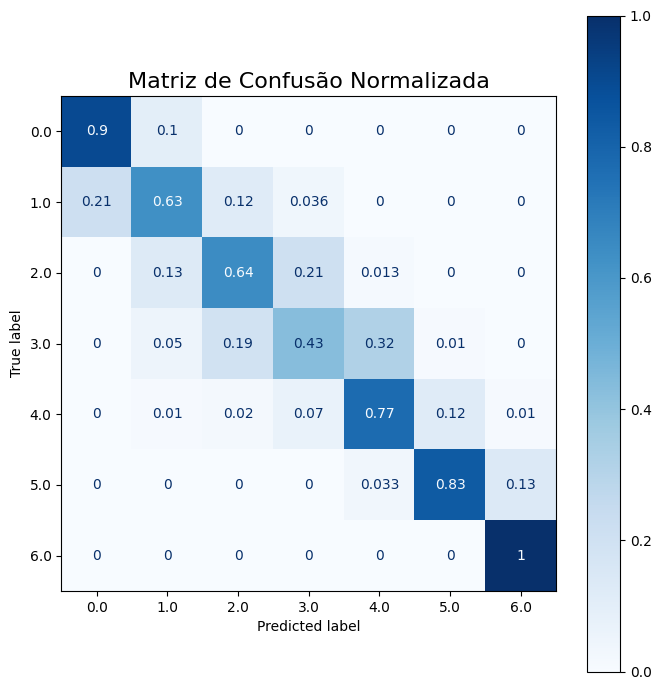

Modelo não possui feature_importances_ para plotar.


In [ ]:
# plotar matriz de confusão
plot_matriz_confusao(modelo_treinado, X_test, y_test)

# Only plot feature importances for models that have the attribute
if hasattr(modelo_treinado, 'feature_importances_'):
    plot_importancia_variaveis(modelo_treinado, X_test)
else:
    print("Modelo não possui feature_importances_ para plotar.")

### Random Forest

O random forest apresentou excelente desempenho, com acurácia de 94,8% e alta precisão em todas as classes. O modelo conseguiu capturar bem padrões complexos e distribuições não lineares, oferecendo predições consistentes inclusive nas classes intermediárias. Além disso, a análise de importância das variáveis mostrou que o modelo considera múltiplos fatores além do peso, o que reforça sua relevância clínica.

In [ ]:
# treinar, testar e exibir
modelo_treinado, X_test, y_test = treinar_modelo(df_modelo)


Acurácia: 0.9401

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95        79
         1.0       0.80      0.98      0.88        84
         2.0       0.88      0.78      0.83        76
         3.0       0.94      0.88      0.91       100
         4.0       0.98      0.98      0.98       100
         5.0       1.00      1.00      1.00        90
         6.0       1.00      1.00      1.00       105

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634



In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Definir o k-fold (ex.: 5 ou 10 folds)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=4242)

# Avaliar com cross-validation
scores = cross_val_score(modelo_treinado, X_test, y_test, cv=kfold, scoring='accuracy')

print("Acurácias em cada fold:", scores)
print("Média da acurácia:", scores.mean())
print("Desvio padrão:", scores.std())


Acurácias em cada fold: [0.90551181 0.87401575 0.92125984 0.8976378  0.92857143]
Média da acurácia: 0.9053993250843645
Desvio padrão: 0.019150380153008264


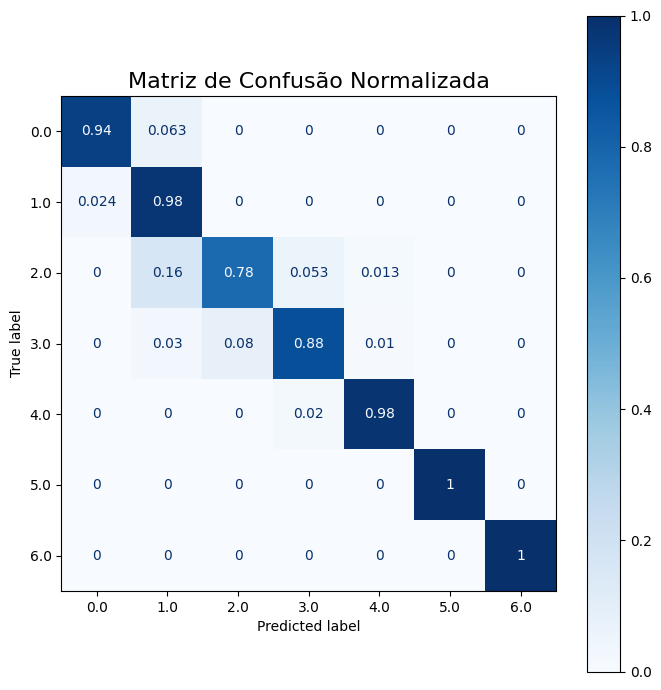

/tmp/ipython-input-1259114697.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importância', y='Feature', data=df_importancia, palette='viridis')


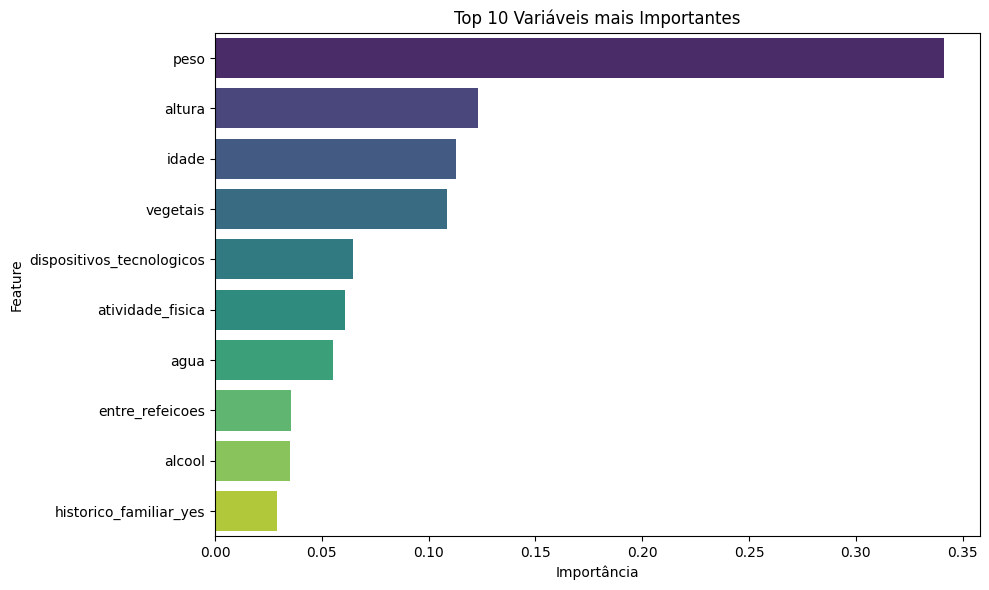

In [ ]:
# plotar matriz de confusao e importância das variáveis
plot_matriz_confusao(modelo_treinado, X_test, y_test)
plot_importancia_variaveis(modelo_treinado, X_test)


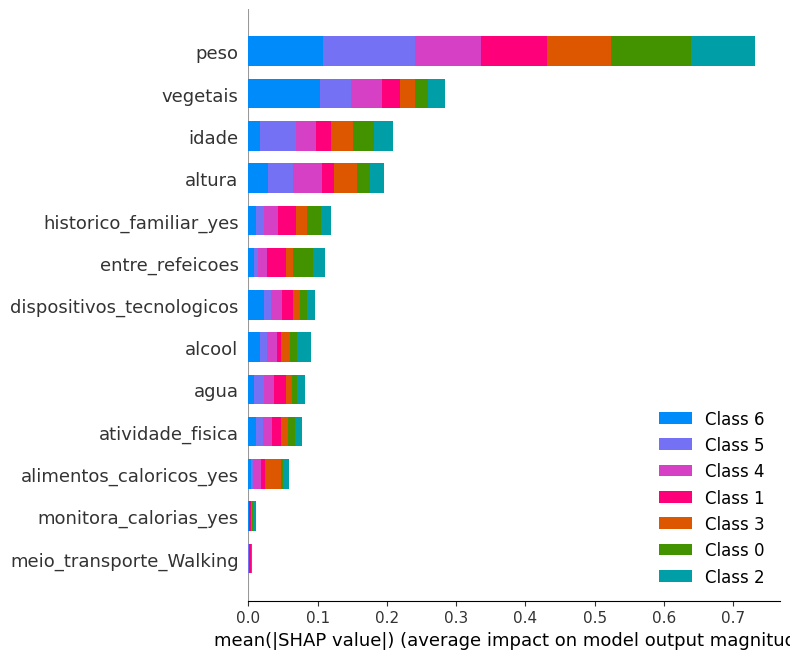

In [ ]:
# plotar shap
explainer = shap.TreeExplainer(modelo_treinado)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")


### Gradient boosting

O gradient boosting apresentou excelente desempenho no projeto, com acurácia de 94,8% e alta precisão em todas as classes. O modelo foi eficaz em capturar padrões complexos e sutis entre as variáveis, oferecendo predições consistentes inclusive nas classes intermediárias. Seria uma alternativa ao random forest, porém houve maior dependência em uma só variável.

In [ ]:
# treinar, testar e exibir
modelo_treinado, X_test, y_test = treinar_modelo(df_modelo, modelo=GradientBoostingClassifier(random_state=4242))

Acurácia: 0.9479

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95        79
         1.0       0.85      0.94      0.89        84
         2.0       0.90      0.86      0.88        76
         3.0       0.98      0.91      0.94       100
         4.0       0.95      0.98      0.97       100
         5.0       1.00      0.97      0.98        90
         6.0       1.00      1.00      1.00       105

    accuracy                           0.95       634
   macro avg       0.95      0.94      0.94       634
weighted avg       0.95      0.95      0.95       634



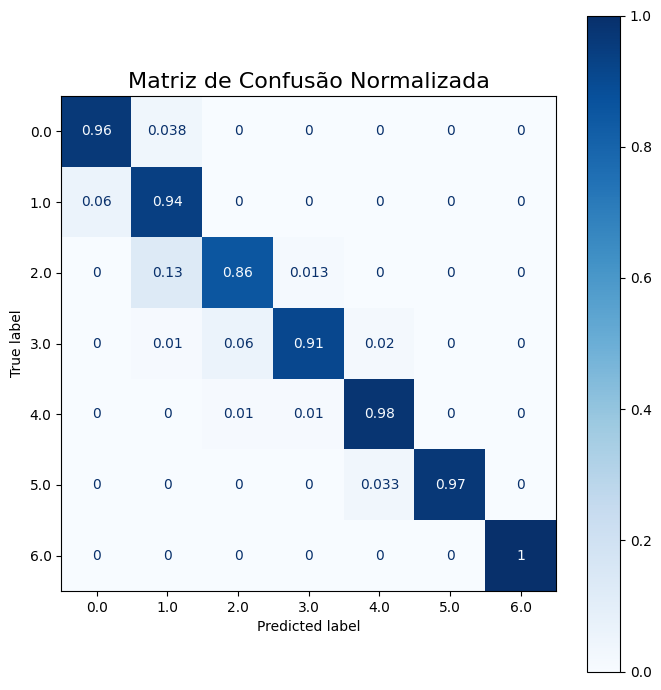

/tmp/ipython-input-1259114697.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importância', y='Feature', data=df_importancia, palette='viridis')


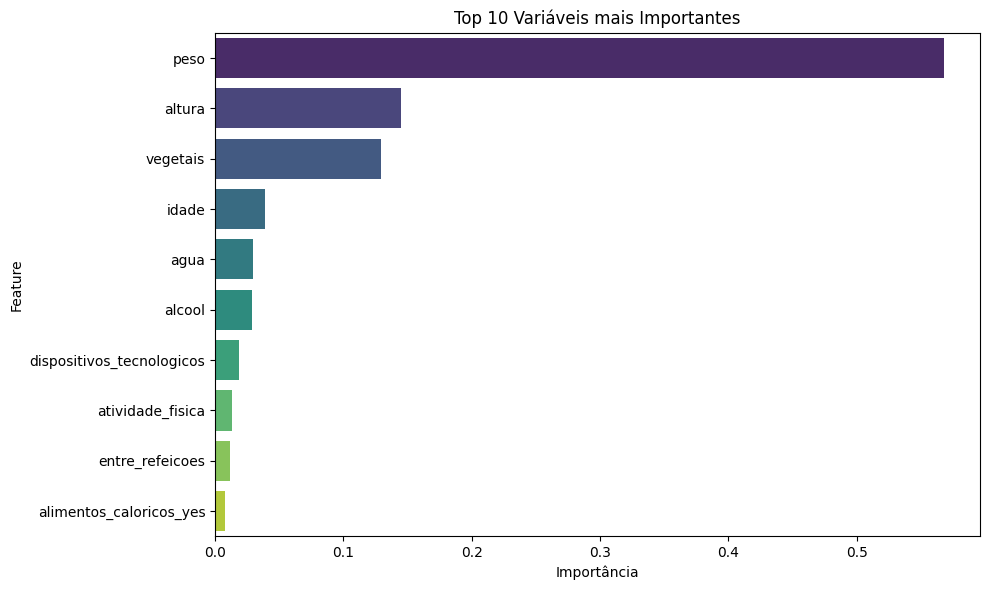

In [ ]:
# plotar matriz de confusão
plot_matriz_confusao(modelo_treinado, X_test, y_test)

# só exibir a importância das variáveis para modelos que possuem o atributo
if hasattr(modelo_treinado, 'feature_importances_'):
    plot_importancia_variaveis(modelo_treinado, X_test)
else:
    print("Modelo não possui feature_importances_ para plotar.")

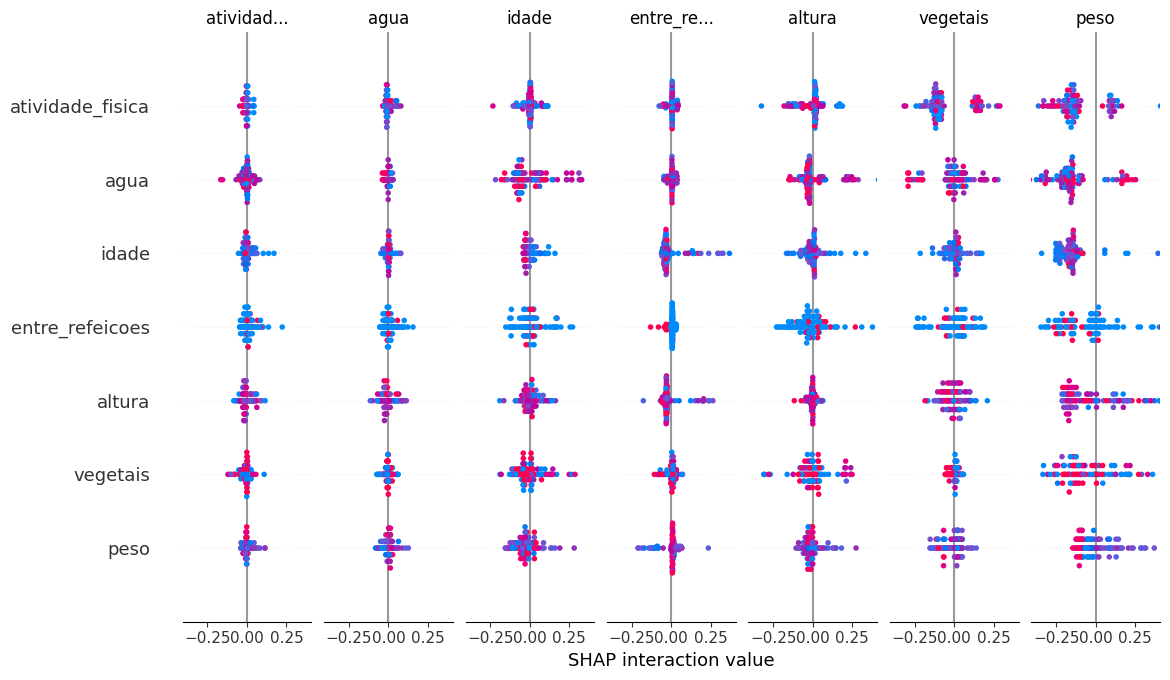

In [ ]:

# selecionar um subconjunto pequeno dos dados para tentar gerar o shap
X_sample = X_test.sample(100, random_state=4242)
shap_values = explainer.shap_values(X_sample)
shap.summary_plot(shap_values, X_sample)
